In [44]:
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

-> We generate some random variates from a non-normal distribution and make a probability plot for it, to show it is non-normal in the tails:

Text(0.5, 1.0, 'Probplot against normal distribution')

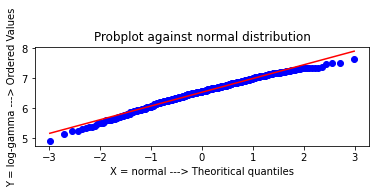

In [45]:
fig = plt.figure()
ax1 = plt.subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5   # loggamma:- is the one of the power law distrubution
prob = stats.probplot(x, dist=stats.norm, plot=ax1)  # stats.probplot :- Q-Q plot
ax1.set_xlabel('X = normal ---> Theoritical quantiles')
ax1.set_ylabel('Y = log-gamma ---> Ordered Values')
ax1.set_title('Probplot against normal distribution')


#### As we can see, in the above plot lot of points are deviating from the straight-line. So, we can say that 'x & y' are not from the same distribution.

-> We now use boxcox to transform the data so it’s closest to normal:

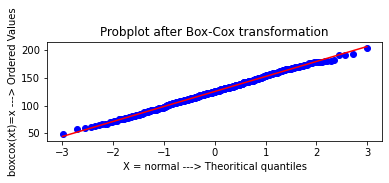

In [50]:
plt.close()
ax2 = plt.subplot(212)
#print(stats.boxcox(x)) # Retuns ndarray
xt, _= stats.boxcox(x)  # Here 'x' is power=law distributed which is (loggamma distrubution)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)  # stats.probplit:- Q-Q plot
ax2.set_xlabel('X = normal ---> Theoritical quantiles')
ax2.set_ylabel('boxcox(xt)=x ---> Ordered Values')
ax2.set_title('Probplot after Box-Cox transformation')
plt.show()

#### In the above plot, all the points are on/close to the straight-line. So, we can say that 'xt' is normally distrubuted(both are from same distribution).

### Note/Correction: Box-cox transform is not guaranteed to work on all Pareto or power-law distributed data. It works only on some of them and we need to perform the box-cox transform and observe the QQ-plot to be certain of it working well on our data.